In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
data=pd.read_csv('../input/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [3]:

data.drop('Unnamed: 0',axis=1,inplace=True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [4]:
data.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [5]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


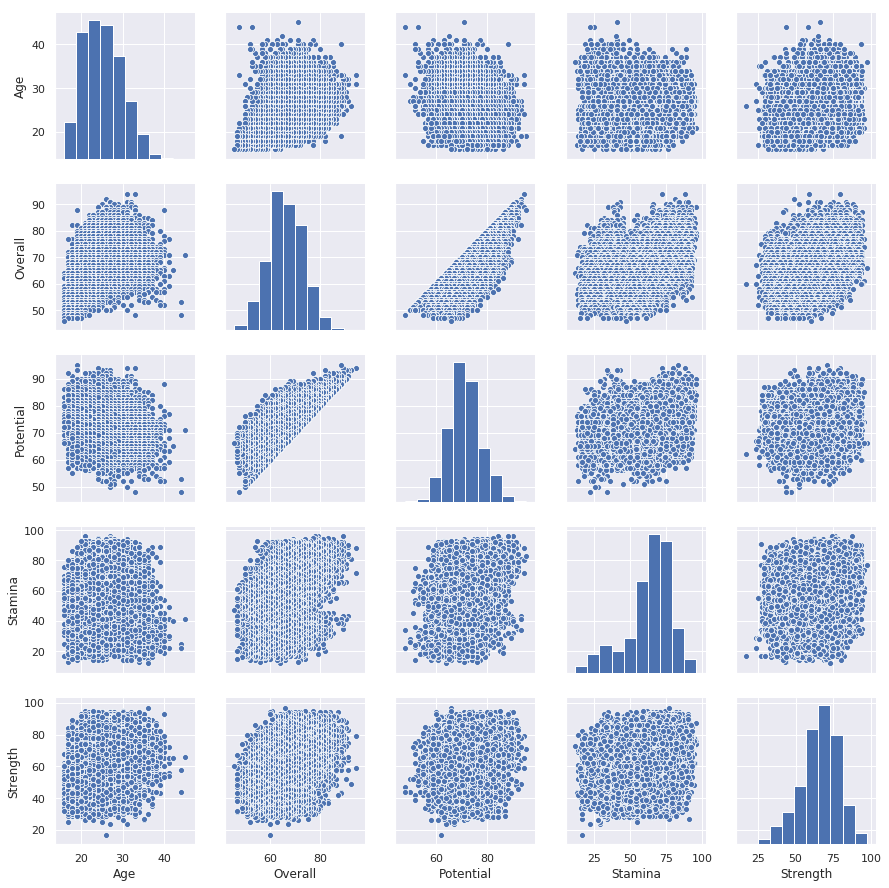

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(data[['Age','Overall','Potential','Stamina','Strength']])

In [7]:
data.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

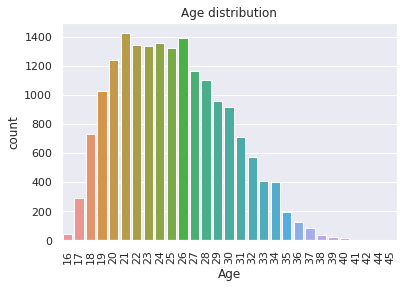

In [8]:
sns.countplot(data['Age'])
plt.xticks(rotation=90)
plt.title('Age distribution')
plt.show()

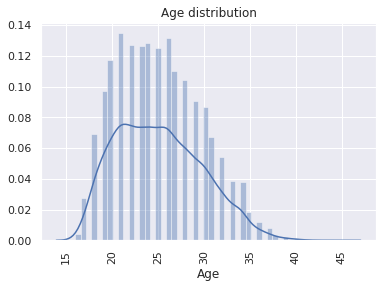

In [9]:
sns.distplot(data['Age'])
plt.xticks(rotation=90)
plt.title('Age distribution')
plt.show()

In [10]:
countries=data['Nationality'].value_counts()
index=countries.index
con=pd.DataFrame({'Country':index,'Count':countries})
con['Percentage%']=(con['Count']/con['Count'].sum())*100
con

Country  Count  Percentage%
England                            England   1662     9.128357
Germany                            Germany   1198     6.579887
Spain                                Spain   1072     5.887845
Argentina                        Argentina    937     5.146372
France                              France    914     5.020047
...                                    ...    ...          ...
São Tomé & Príncipe    São Tomé & Príncipe      1     0.005492
United Arab Emirates  United Arab Emirates      1     0.005492
Liberia                            Liberia      1     0.005492
Jordan                              Jordan      1     0.005492
St Lucia                          St Lucia      1     0.005492

[164 rows x 3 columns]

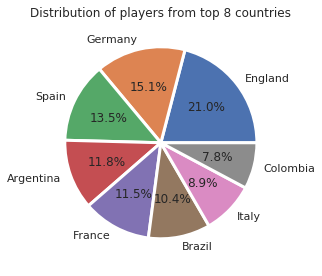

In [11]:
con=con['England':'Colombia']
plt.pie(con['Count'],labels=con['Country'],wedgeprops = {'linewidth': 3},autopct='%1.1f%%')
plt.title('Distribution of players from top 8 countries')
plt.tight_layout()
plt.show()

In [12]:
barca=data[data['Club']=='FC Barcelona']
madrid=data[data['Club']=='Real Madrid']
print(barca.head())
print(madrid.head())

        ID             Name  Age  \
0   158023         L. Messi   31   
7   176580        L. Suárez   31   
18  192448    M. ter Stegen   26   
20  189511  Sergio Busquets   29   
32  189242         Coutinho   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
20  https://cdn.sofifa.org/players/4/19/189511.png       Spain   
32  https://cdn.sofifa.org/players/4/19/189242.png      Brazil   

                                   Flag  Overall  Potential          Club  \
0   https://cdn.sofifa.org/flags/52.png       94         94  FC Barcelona   
7   https://cdn.sofifa.org/flags/60.png       91         91  FC Barcelona   
18  https://cdn.sofifa.org/flags/21.png       89         92  FC Barcelona   
20  https://cdn.sofifa.org/flags/45.png       89         89  FC Barcelona   
3

In [13]:
print(barca['Position'].value_counts())
print(madrid['Position'].value_counts())

CB     4
GK     4
RW     3
CDM    3
CM     3
RB     3
ST     2
LB     2
CAM    2
LCM    1
RF     1
RCM    1
LW     1
RCB    1
RS     1
LCB    1
Name: Position, dtype: int64
ST     5
CB     4
GK     4
LB     3
RB     3
LW     3
LCM    2
CM     2
CDM    2
RW     2
RCB    2
RCM    1
Name: Position, dtype: int64


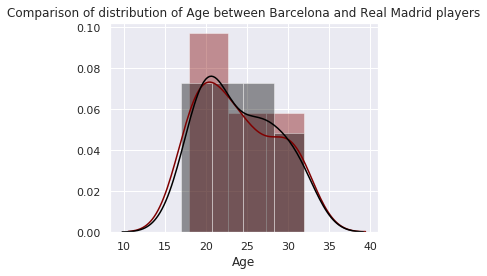

In [14]:
sns.distplot(barca['Age'],color='maroon')
sns.distplot(madrid['Age'],color='black')
plt.title('Comparison of distribution of Age between Barcelona and Real Madrid players')
plt.tight_layout()
plt.show()

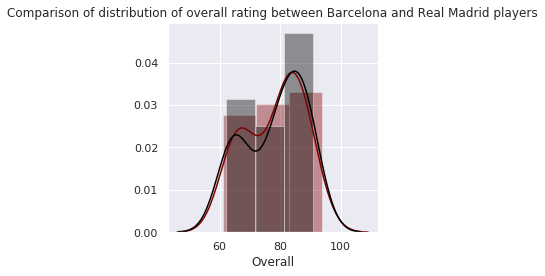

In [15]:
sns.distplot(barca['Overall'],color='maroon')
sns.distplot(madrid['Overall'],color='black')
plt.title('Comparison of distribution of overall rating between Barcelona and Real Madrid players')
plt.tight_layout()
plt.show()

In [16]:
barca['Wage']=barca['Wage'].str[1:-1]
barca['Wage(in K)']=barca['Wage'].astype(int)
barca.drop('Wage',axis=1,inplace=True)

madrid['Wage']=madrid['Wage'].str[1:-1]
madrid['Wage(in K)']=madrid['Wage'].astype(int)
madrid.drop('Wage',axis=1,inplace=True)

print(barca['Wage(in K)'].sample(5))
print(madrid['Wage(in K)'].sample(5))

236      140
12502     10
1037     110
8284      14
18       240
Name: Wage(in K), dtype: int64
8        380
8732      24
35       285
10269     20
105      240
Name: Wage(in K), dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

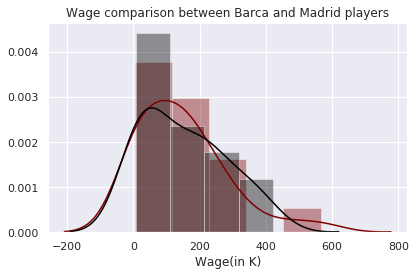

In [17]:
sns.distplot(barca['Wage(in K)'],color='maroon')
sns.distplot(madrid['Wage(in K)'],color='black')
plt.title('Wage comparison between Barca and Madrid players')
plt.tight_layout()
plt.show()

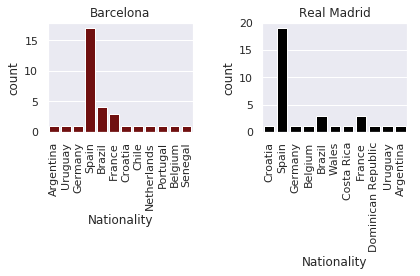

In [18]:
plt.subplot(1,2,1)
sns.countplot(barca['Nationality'],color='maroon')
plt.xticks(rotation=90)
plt.title('Barcelona')
plt.subplot(1,2,2)
sns.countplot(madrid['Nationality'],color='black')
plt.xticks(rotation=90)
plt.title('Real Madrid')
plt.tight_layout()
plt.show()

In [19]:
barca.head()

ID             Name  Age  \
0   158023         L. Messi   31   
7   176580        L. Suárez   31   
18  192448    M. ter Stegen   26   
20  189511  Sergio Busquets   29   
32  189242         Coutinho   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
20  https://cdn.sofifa.org/players/4/19/189511.png       Spain   
32  https://cdn.sofifa.org/players/4/19/189242.png      Brazil   

                                   Flag  Overall  Potential          Club  \
0   https://cdn.sofifa.org/flags/52.png       94         94  FC Barcelona   
7   https://cdn.sofifa.org/flags/60.png       91         91  FC Barcelona   
18  https://cdn.sofifa.org/flags/21.png       89         92  FC Barcelona   
20  https://cdn.sofifa.org/flags/45.png       89         89  FC Barcelona   
32  https://cdn.sofifa.org/flags/54.png       88         89  FC Barcelona   

                                       Club Logo  ... Marking  StandingTackle  \
0   https://cdn.sofifa.org/teams/2/light/241.png  ...    33.0            28.0   
7   https://cdn.sofifa.org/teams/2/light/241.png  ...    62.0            45.0   
18  https://cdn.sofifa.org/teams/2/light/241.png  ...    25.0            13.0   
20  https://cdn.sofifa.org/teams/2/light/241.png  ...    90.0            86.0   
32  https://cdn.sofifa.org/teams/2/light/241.png  ...    55.0            54.0   

   SlidingTackle  GKDiving  GKHandling  GKKicking GKPositioning GKReflexes  \
0           26.0       6.0        11.0       15.0          14.0        8.0   
7           38.0      27.0        25.0       31.0          33.0       37.0   
18          10.0      87.0        85.0       88.0          85.0       90.0   
20          80.0       5.0         8.0       13.0           9.0       13.0   
32          47.0      12.0         7.0        9.0          14.0        6.0   

   Release Clause Wage(in K)  
0         €226.5M        565  
7           €164M        455  
18        €123.3M        240  
20        €105.6M        315  
32        €147.7M        340  

[5 rows x 88 columns]

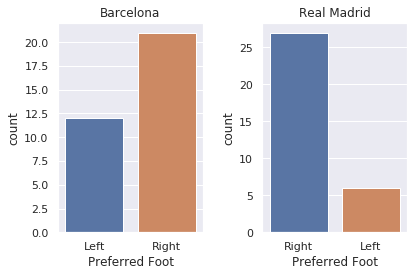

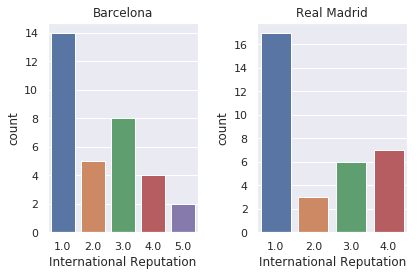

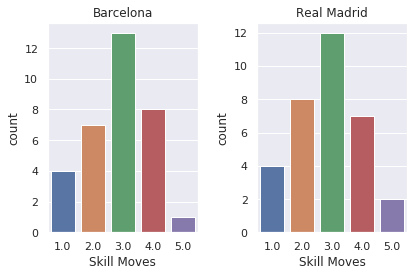

In [20]:
cols=['Preferred Foot','International Reputation','Weak Foot','Skill Moves']
for col in cols:
    plt.subplot(1,2,1)
    sns.countplot(barca[col])
    plt.title('Barcelona')
    plt.subplot(1,2,2)
    sns.countplot(madrid[col])
    plt.title('Real Madrid')
    plt.tight_layout()
    plt.show()

In [21]:
barca['Weight']=barca['Weight'].str[:-3]
barca['Weight']=barca['Weight'].astype(int)

madrid['Weight']=madrid['Weight'].str[:-3]
madrid['Weight']=madrid['Weight'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

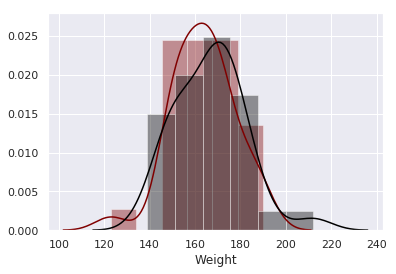

In [22]:
sns.distplot(barca['Weight'],color='maroon')
sns.distplot(madrid['Weight'],color='black')
plt.show()